In [1]:
from NN import *
from LTL import *
from Utility_funcs import *

%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np
from matplotlib import pyplot as plt
import time
import os

2023-10-02 20:18:16.148065: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of Omega-automaton states (including the trap state): 7


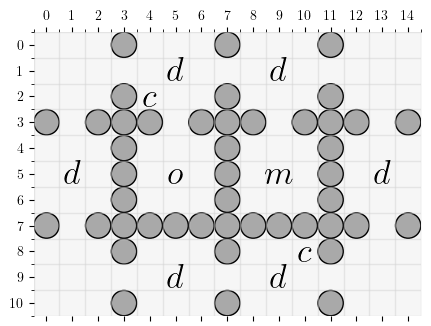

In [2]:
task_coffe_mail_delivery = ('G ! d & '
          '(F (m & X F (c & X F o)) |'
          'F (c & X F (m & X F o)))'
          )

# Translate the LTL formula to an LDBA
oa = OmegaAutomaton(task_coffe_mail_delivery)
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])

# MDP Description
shape = (11, 15)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E', 'E',  'E',  'E',  'E',  'E',  'E',  'E', 'E'],
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E'],
['B',  'E',  'B',  'B',  'B',  'E',  'B', 'B',  'B',  'E',  'B',  'B',  'B',  'E', 'B'],
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E'],
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E'],
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E'],
['B',  'E',  'B',  'B',  'B',  'B',  'B', 'B',  'B',  'B',  'B',  'B',  'B',  'E', 'B'],
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E', 'E',  'E',  'E',  'E',  'E',  'E',  'E', 'E'],
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E']
])

# Labels of the states
label = np.array([
[(),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    ()],
[(),    (),    (),    (),    (),    ('d',),(),    (),    (),    ('d',),(),    (),    (),    (),    ()],
[(),    (),    (),    (),('c',),    (),    (),    (),    (),    (),    (),    (),    (),    (),    ()],
[(),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    ()],
[(),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    ()],
[(),('d',),    (),    (),    (),('o',),    (),    (),    (),    ('m',),(),    (),    (),('d',),    ()],
[(),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    ()],
[(),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    ()],
[(),    (),    (),    (),    (),    (),    (),    (),    (),    (),('c',),    (),    (),    (),    ()],
[(),    (),    (),    (),    (),('d',),    (),    (),    (),('d',),    (),    (),    (),    (),    ()],
[(),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    ()]
],dtype=object)
# Colors of the labels
lcmap={
    # ('a',):'yellow',
    # ('b',):'greenyellow',
    # ('c',):'brown',
    # ('x',):'pink',
    # ('e',):'limegreen',
    # ('o',):'springgreen',
    # ('m',):'turquoise'
}
p=1
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,lcmap=lcmap, p=p, figsize=5)  # Use figsize=4 for smaller figures
grid_mdp.plot(save="env.pdf")

# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)
max_rew = round(csrl.reward.max(), 3)

s_vectors = state_vectors(csrl)
enc = list(np.unique(grid_mdp.label))
enc.pop(enc.index(()))
ch_states = channeled(csrl, enc)
total_number_of_states = csrl.mdp.shape[0]*csrl.mdp.shape[1]*csrl.oa.shape[1]

ltl = "[] ~ d /\ (<> (m /\ > <> (c /\ > <> o)) \/ <> (c /\ > <> (m /\ > <> o)))"

LTL_formula = parser.parse(ltl)
predicates=get_predicates(grid_mdp)

In [3]:
model = build_model(ch_states[(0,0,0,0)].shape, csrl.shape[-1])
model.summary()

2023-10-02 20:18:26.149750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-02 20:18:26.150059: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11, 15, 7)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 11, 15, 32)   928         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 11, 15, 8)    1032        ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 1320)         0           ['conv2d_1[0][0]']               
                                                                                              

In [14]:
visited_states_train = []
visited_states_test = []
LTL_coef = 10

search_depth = 400
MCTS_samples = 200

num_training_epochs =  30
num_test_epochs = 100
training = True
epochs = 10
T = [50, 75, 100, 150, 200]
K = 1
batch_size = 32
steps_per_epoch = 4
idx = 0
success_rates = []
succes_std = []
win_hist = []
train_history = []
C , tow = 0.01, 0.7

# os.remove("Log_run.txt") # run this line if you want to overright old logs

for i in T:
    print("##########################")
    print("T:", i, "| C:",C, "| tow:",tow)
    idx += 1
    # TRAIN ##############################
    train_wins = 0
    N, W, Q, P, visited_train = np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), set()
    for epoch in range(num_training_epochs):
        t1 = time.time()
        state_history, channeled_states, trajectory, action_history, reward_history, better_policy = MC_learning(csrl, model, LTL_formula,
                predicates, csrl.reward, ch_states, N = N, W = W, Q = Q, P = P, C=C, tow=tow, n_samples=MCTS_samples, visited=visited_train,
                start=None, search_depth=search_depth, verbose=0, T=i, K=K, run_num=epoch, ltl_f_rew=False, LTL_coef=LTL_coef,
                reachability=True, danger_zone='d')
        
        visited_states_train += state_history
        t2 = time.time()

        if reward_history[-1]>0: train_wins+=1

        if training and len(action_history)>0:
            if epoch==0:
                x_train = np.array(channeled_states)[:-1]
                y1_train = np.array(better_policy)
                y2_train = np.array(reward_history) + LTL_coef*reward_history[-1]
                y2_train = y2_train[:-1]
            else:
                x_train = np.concatenate((x_train, np.array(channeled_states)[:-1]),0)
                y1_train = np.concatenate((y1_train, np.array(better_policy)),0)
                y2_train_curr = np.array(reward_history) + LTL_coef*reward_history[-1]
                y2_train = np.concatenate((y2_train, y2_train_curr[:-1]),0)
            t3= time.time()
            tr_hist = model.fit(x_train, [y1_train, y2_train], epochs=epochs, batch_size=batch_size,
                                steps_per_epoch=steps_per_epoch if len(x_train)>steps_per_epoch*epochs*batch_size else None, verbose=0)
            train_history += tr_hist.history['loss']
        t4 = time.time()
    print("Train wins:",train_wins,"/", num_training_epochs)

    # TEST ##############################
    test_wins = 0
    N, W, Q, P, visited_test = np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), set()
    for epoch in range(num_test_epochs):
        
        state_history, channeled_states, trajectory, action_history, reward_history, better_policy = MC_learning(csrl, model, LTL_formula,
                predicates, csrl.reward, ch_states, N = N, W = W, Q = Q, P = P, C=C, tow=tow, n_samples=MCTS_samples, visited=visited_test,
                start=None, search_depth=search_depth, verbose=0, T=i, K=1, NN_value_active=True, reachability=True, danger_zone='d')

        win = reward_history[-1]
        if win: test_wins+=1
        win_hist.append(win)
        visited_states_test += state_history
        
    success_rates.append(100*test_wins/num_test_epochs)
    temp = np.zeros(num_test_epochs)
    temp[:test_wins]=1
    std = np.sqrt(num_test_epochs*np.var(temp))
    succes_std.append((success_rates[-1]-std, success_rates[-1]+std))
    ###############################################################
    print("Test wins:",test_wins,"/",num_test_epochs)
    
encode_visited_states_test = [i[1]*csrl.shape[-2]*csrl.shape[-3]+i[2]*csrl.shape[-2]+i[3] for i in visited_states_test]
encode_visited_states_train = [i[1]*csrl.shape[-2]*csrl.shape[-3]+i[2]*csrl.shape[-2]+i[3] for i in visited_states_train]



##########################
T: 50 | C: 0.01 | tow: 0.7
0 ) MCTS conf: -0.15 , det: 0.82 | LTL [---]  LDBA [ 0.0 ] path: [1, 2, 17, 18, 19, 34, 35, 36, 21, 22, 23, 8, 9, 10, 10, 25, 26, 27, 12, 13, 14, 29, 44, 43, 58, 73, 74, 89, 104, 103, 118, 133, 134, 149, 148, 147, 146, 145, 130, 129, 128, 143, 142, 141, 156, 155, 154, 139, 138, 137]
1 ) MCTS conf: 0.78 , det: 0.78 | LTL [+++]  LDBA [ 0.01 ] path: [10, 10, 9, 8, 23, 22, 21, 6, 5, 4, 19, 34, 35, 36, 21, 22, 23, 8, 9, 10, 25, 40, 39, 54, 69, 84, 69, 54, 39, 38, 23, 22, 21, 6, 5, 4, 19, 34, 35, 50, 65, 80, 65]
2 ) MCTS conf: -0.11 , det: 0.64 | LTL [+++]  LDBA [ 0.01 ] path: [146, 147, 132, 133, 118, 118, 103, 102, 87, 72, 73, 58, 43, 28, 29, 14, 13, 12, 27, 26, 25, 40, 39, 54, 69, 84, 69, 54, 39, 38, 23, 22, 21, 6, 5, 4, 19, 34, 19, 34, 35, 50, 65, 80, 65]
3 ) MCTS conf: 0.99 , det: 1.0 | LTL [+++]  LDBA [ 0.01 ] path: [50, 35, 34, 35, 36, 21, 22, 23, 8, 9, 10, 25, 40, 39, 54, 69, 84, 69, 54, 39, 38, 23, 22, 21, 6, 5, 4, 19, 34, 35, 50

In [9]:
# model.save_weights(f'./models/office_p1(3)')

In [10]:
from ipywidgets.widgets import IntSlider
from ipywidgets import interact

def plot_agent(t):
    csrl.mdp.plot(agent=state_history[t][2:], save=f'test/{t}.png')

t=IntSlider(value=0,min=0,max=T[-1]-1)
interact(plot_agent,t=t)

interactive(children=(IntSlider(value=0, description='t', max=49), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_agent(t)>